In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Graph for the Default Training and Validation Loss

In [43]:
default = pd.read_excel('./default_training_results.xlsx')
default = default.replace('-', 0)
default['Validation loss'] = [i for i in list(default['Validation loss'])]

validation_df = {'validation': [], 'step': []}
for i in range(len(default)):
    if default['Validation loss'][i] != 0:
        validation_df['validation'].append(default['Validation loss'][i])
        validation_df['step'].append(default['Step'][i])

/var/folders/12/p5c0vdcj3yx9xb69fcd0n3j80000gn/T/ipykernel_59973/989018232.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  default = default.replace('-', 0)


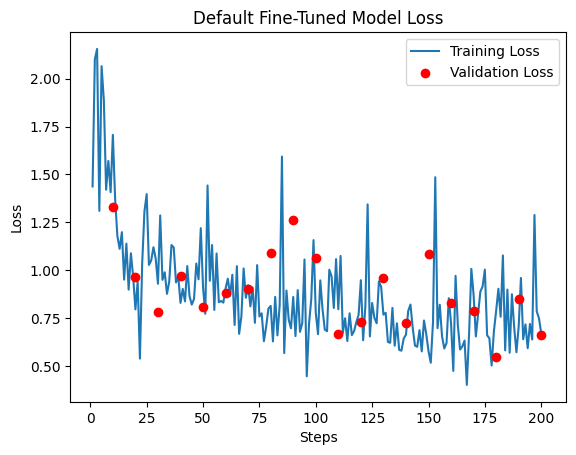

In [63]:
plt.plot(default['Step'], default['Training loss'], zorder= -1, label='Training Loss')
plt.scatter(validation_df['step'], validation_df['validation'], c='red', label='Validation Loss')
plt.legend()
plt.title("Default Fine-Tuned Model Loss")
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.savefig('./images/defaultModelLoss.png',bbox_inches='tight')
plt.show()

## Graph for the Evaluation Scores

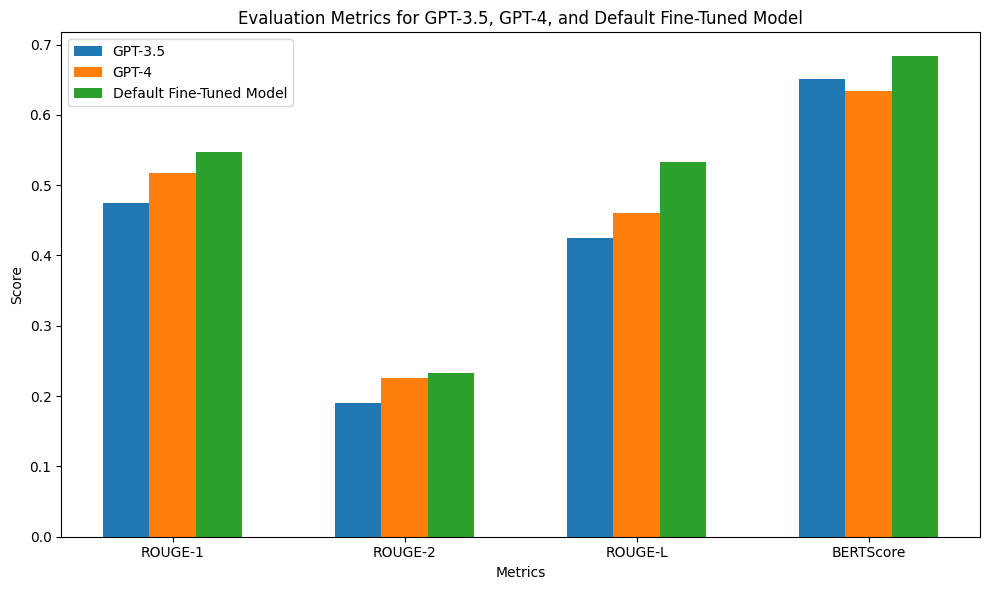

In [10]:
eval_df = pd.read_csv('./evaluation_metrics.csv')
eval_df.set_index('id', inplace=True)

filtered_eval_df = eval_df.loc[['GPT-3.5', 'GPT-4', 'default-aci-bench']]

metrics = ['rouge1', 'rouge2', 'rougeL', 'bertScore']
capitalized_metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BERTScore']
models = ['GPT-3.5', 'GPT-4', 'default-aci-bench']
label_models = ['GPT-3.5', 'GPT-4', 'Default Fine-Tuned Model']
values = filtered_eval_df.loc[models, metrics].values

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(metrics))

for i, model in enumerate(models):
    ax.bar(index + i * bar_width, values[i], bar_width, label=label_models[i])

ax.set_title('Evaluation Metrics for GPT-3.5, GPT-4, and Default Fine-Tuned Model')
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(capitalized_metrics)

ax.legend()

plt.tight_layout()
plt.savefig('./images/evaluationMetrics.png')
plt.show()